In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
df=pd.read_excel("C:\\Users\Ogeid99\Desktop\catalogueCSI11.xlsx")
df

,OriginTime,Time,LatitudeFake,Latitude,LongitudeFake,Longitude,Depth/Km,Magnitude,MagnitudeType,RMS,AzimutalGap,ERH,ERZ,DistSeismometer,NPH,Column14
0,34.55,9701011034,37n54.49,3754.49,13e59.09,1359.09,11.12,2.7,MlREG,0.2574,105,0.7,1.0,8,16,97EV00003
1,1.42,9701011240,42n10.60,4210.60,17e08.99,1708.99,18.95,2.4,MlREG,0.7079,297,7.9,2.4,112,7,97EV00004
2,47.18,9701011928,38n24.95,3824.95,15e28.38,1528.38,91.90,999.0,-----,0.2146,105,0.6,1.7,28,19,97EV00005
3,6.68,9701011947,38n49.21,3849.21,16e40.36,1640.36,0.03,2.4,MlREG,0.1094,219,2.2,2.7,22,13,97EV00006
4,43.00,9701011956,47n20.87,4720.87,9e14.76,914.76,7.22,2.3,MlREG,0.1798,280,10.7,9.0,169,10,97EV00007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11813,41.49,9712311815,44n11.47,4411.47,10e23.38,1023.38,5.28,2.0,MlREG,0.1586,143,0.3,0.2,1,9,97EV24548
11814,12.75,9712311839,42n49.95,4249.95,13e00.31,1300.31,1.61,999.0,-----,0.1217,103,0.5,0.9,9,21,97EV24549
11815,26.94,9712311921,42n59.58,4259.58,12e55.37,1255.37,6.34,999.0,-----,0.0549,296,1.4,99.0,18,8,97EV24551
11816,23.55,9712312209,42n49.06,4249.06,13e14.09,1314.09,9.33,1.7,MlREG,0.1613,248,0.9,0.8,10,9,97EV24558


### DATA CLEANSING AND MANIPULATION

In [24]:
a=df.drop(['LatitudeFake', 'LongitudeFake'], axis=1)
a

,OriginTime,Time,Latitude,Longitude,Depth/Km,Magnitude,MagnitudeType,RMS,AzimutalGap,ERH,ERZ,DistSeismometer,NPH,Column14
0,34.55,9701011034,3754.49,1359.09,11.12,2.7,MlREG,0.2574,105,0.7,1.0,8,16,97EV00003
1,1.42,9701011240,4210.60,1708.99,18.95,2.4,MlREG,0.7079,297,7.9,2.4,112,7,97EV00004
2,47.18,9701011928,3824.95,1528.38,91.90,999.0,-----,0.2146,105,0.6,1.7,28,19,97EV00005
3,6.68,9701011947,3849.21,1640.36,0.03,2.4,MlREG,0.1094,219,2.2,2.7,22,13,97EV00006
4,43.00,9701011956,4720.87,914.76,7.22,2.3,MlREG,0.1798,280,10.7,9.0,169,10,97EV00007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11813,41.49,9712311815,4411.47,1023.38,5.28,2.0,MlREG,0.1586,143,0.3,0.2,1,9,97EV24548
11814,12.75,9712311839,4249.95,1300.31,1.61,999.0,-----,0.1217,103,0.5,0.9,9,21,97EV24549
11815,26.94,9712311921,4259.58,1255.37,6.34,999.0,-----,0.0549,296,1.4,99.0,18,8,97EV24551
11816,23.55,9712312209,4249.06,1314.09,9.33,1.7,MlREG,0.1613,248,0.9,0.8,10,9,97EV24558


In [25]:
import numpy as np
a['Magnitude']=a['Magnitude'].replace({999.0:None}) 
a['Time']=a['Time'].astype(str)
function = lambda z: z[:2] +'-'+z[2:4]+'-'+z[4:6]+'-'+z[6:8]+':'+z[8:10] 
a['Time']=a['Time'].map(function) #if you run the script multiple times, strange things will happen
a['Time']


0        97-01-01-10:34
1        97-01-01-12:40
2        97-01-01-19:28
3        97-01-01-19:47
4        97-01-01-19:56
              ...      
11813    97-12-31-18:15
11814    97-12-31-18:39
11815    97-12-31-19:21
11816    97-12-31-22:09
11817    97-12-31-22:20
Name: Time, Length: 11818, dtype: object

In [26]:
func= lambda x: x/100
a['Latitude']=a['Latitude'].map(func)
a['Longitude']=a['Longitude'].map(func)

In [8]:
a.dropna()

,OriginTime,Time,Latitude,Longitude,Depth/Km,Magnitude,MagnitudeType,RMS,AzimutalGap,ERH,ERZ,DistSeismometer,NPH,Column14
0,34.55,97-01-01-10:34,0.375449,0.135909,11.12,2.7,MlREG,0.2574,105,0.7,1.0,8,16,97EV00003
1,1.42,97-01-01-12:40,0.421060,0.170899,18.95,2.4,MlREG,0.7079,297,7.9,2.4,112,7,97EV00004
3,6.68,97-01-01-19:47,0.384921,0.164036,0.03,2.4,MlREG,0.1094,219,2.2,2.7,22,13,97EV00006
4,43.00,97-01-01-19:56,0.472087,0.091476,7.22,2.3,MlREG,0.1798,280,10.7,9.0,169,10,97EV00007
13,52.89,97-01-02-12:12,0.444341,0.103657,5.20,1.8,MlREG,0.2593,151,0.7,14.6,37,11,97EV00023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11810,12.23,97-12-31-16:37,0.425165,0.125997,1.60,1.7,MlMDN,0.3407,53,0.2,0.3,10,33,97EV24544
11812,57.45,97-12-31-17:03,0.425143,0.130026,5.40,1.8,MlMDN,0.2528,53,0.1,0.3,9,34,97EV24546
11813,41.49,97-12-31-18:15,0.441147,0.102338,5.28,2,MlREG,0.1586,143,0.3,0.2,1,9,97EV24548
11816,23.55,97-12-31-22:09,0.424906,0.131409,9.33,1.7,MlREG,0.1613,248,0.9,0.8,10,9,97EV24558



#### Inexplicably spatial distribution in CSI 1.1

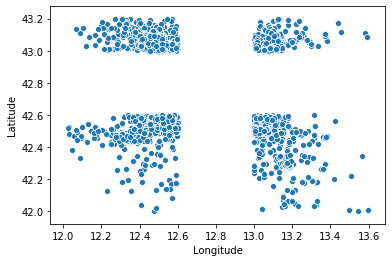

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
lat=(a['Latitude']<43.20) & (a['Latitude']>42.00)
long=(a['Longitude']<14.00)& (a['Longitude']>12.00)
a_colfiorito= a[(lat) & (long)]
sns.scatterplot(x="Longitude", y="Latitude", data=a_colfiorito)


In [30]:
a_colfiorito


,OriginTime,Time,Latitude,Longitude,Depth/Km,Magnitude,MagnitudeType,RMS,AzimutalGap,ERH,ERZ,DistSeismometer,NPH,Column14
36,57.83,97-01-04-11:28,42.4152,13.1376,4.37,1.8,MlREG,0.1998,88,0.1,0.3,10,38,97EV00071
44,27.55,97-01-05-03:40,43.1181,13.4582,24.94,1.8,MlREG,0.3502,197,0.3,0.2,34,26,97EV00085
218,9.25,97-01-17-11:15,43.1535,12.4248,14.15,1.6,MlREG,1.1936,268,4.5,13.8,33,7,97EV00454
244,30.11,97-01-19-01:54,43.0184,12.5058,10.82,1.7,MlREG,0.3181,92,0.2,0.9,16,14,97EV00500
320,4.23,97-01-24-05:42,43.0925,13.1434,17.31,1.7,MlMDN,0.2412,66,0.1,0.4,17,38,97EV00647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,5.19,97-12-31-16:28,42.5219,13.0014,7.89,2.7,MlMDN,0.4476,52,0.2,0.7,10,56,97EV24543
11810,12.23,97-12-31-16:37,42.5165,12.5997,1.60,1.7,MlMDN,0.3407,53,0.2,0.3,10,33,97EV24544
11812,57.45,97-12-31-17:03,42.5143,13.0026,5.40,1.8,MlMDN,0.2528,53,0.1,0.3,9,34,97EV24546
11816,23.55,97-12-31-22:09,42.4906,13.1409,9.33,1.7,MlREG,0.1613,248,0.9,0.8,10,9,97EV24558
